In [55]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append('C:/Users/Petr.Yurchenko/McKinsey_Severstal_Hack_2022')
from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

from server2022.src.train_val import *
from server2022.src.model import *
from server2022.data.processed.prepare_data import *

In [2]:
#df = create_df_0years_known()
df = create_df_1year_known()

In [3]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]
# df = df.fillna(0)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
df.head(3)

,Наименование ДП,Итого,"-4, Нематериальные активы, RUB","-3, Нематериальные активы, RUB","-2, Нематериальные активы, RUB","-1, Нематериальные активы, RUB","-4, Основные средства , RUB","-3, Основные средства , RUB","-2, Основные средства , RUB","-1, Основные средства , RUB","-4, Внеоборотные активы, RUB","-3, Внеоборотные активы, RUB","-2, Внеоборотные активы, RUB","-1, Внеоборотные активы, RUB","-4, Дебиторская задолженность, RUB","-3, Дебиторская задолженность, RUB","-2, Дебиторская задолженность, RUB","-1, Дебиторская задолженность, RUB","-4, Оборотные активы, RUB","-3, Оборотные активы, RUB","-2, Оборотные активы, RUB","-1, Оборотные активы, RUB","-4, Уставный капитал , RUB","-3, Уставный капитал , RUB","-2, Уставный капитал , RUB","-1, Уставный капитал , RUB","-4, Капитал и резервы, RUB","-3, Капитал и резервы, RUB","-2, Капитал и резервы, RUB","-1, Капитал и резервы, RUB","-4, Заёмные средства (долгосрочные), RUB","-3, Заёмные средства (долгосрочные), RUB","-2, Заёмные средства (долгосрочные), RUB","-1, Заёмные средства (долгосрочные), RUB","-4, Долгосрочные обязательства, RUB","-3, Долгосрочные обязательства, RUB","-2, Долгосрочные обязательства, RUB","-1, Долгосрочные обязательства, RUB","-4, Заёмные средства (краткосрочные), RUB","-3, Заёмные средства (краткосрочные), RUB","-2, Заёмные средства (краткосрочные), RUB","-1, Заёмные средства (краткосрочные), RUB","-4, Кредиторская задолженность, RUB","-3, Кредиторская задолженность, RUB","-2, Кредиторская задолженность, RUB","-1, Кредиторская задолженность, RUB","-4, Краткосрочные обязательства, RUB","-3, Краткосрочные обязательства, RUB","-2, Краткосрочные обязательства, RUB","-1, Краткосрочные обязательства, RUB","-4, Выручка, RUB","-3, Выручка, RUB","-2, Выручка, RUB","-1, Выручка, RUB","-4, Себестоимость продаж, RUB","-3, Себестоимость продаж, RUB","-2, Себестоимость продаж, RUB","-1, Себестоимость продаж, RUB","-4, Прибыль (убыток) до налогообложения , RUB","-3, Прибыль (убыток) до налогообложения , RUB","-2, Прибыль (убыток) до налогообложения , RUB","-1, Прибыль (убыток) до налогообложения , RUB","-4, Прибыль (убыток) от продажи, RUB","-3, Прибыль (убыток) от продажи, RUB","-2, Прибыль (убыток) от продажи, RUB","-1, Прибыль (убыток) от продажи, RUB",year,binary_target,"Макс. ПДЗ за -1 год, дней","Сред. ПДЗ за -1 год, дней","Кол-во просрочек свыше 5-ти дней за -1 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.","Кол-во раз ПДЗ за -1 год, шт.",Нематериальные активы total mean growth,Основные средства total mean growth,Внеоборотные активы total mean growth,Дебиторская задолженность total mean growth,Оборотные активы total mean growth,Уставный капитал total mean growth,Капитал и резервы total mean growth,Заёмные средства (долгосрочные) total mean growth,Долгосрочные обязательства total mean growth,Заёмные средства (краткосрочные) total mean growth,Кредиторская задолженность total mean growth,Краткосрочные обязательства total mean growth,Выручка total mean growth,Себестоимость продаж total mean growth,Прибыль (убыток) до налогообложения total mean growth,Прибыль (убыток) от продажи total mean growth,"Нематериальные активы ,прирост за -3 год","Нематериальные активы ,прирост за -2 год","Нематериальные активы ,прирост за -1 год","Основные средства ,прирост за -3 год","Основные средства ,прирост за -2 год","Основные средства ,прирост за -1 год","Внеоборотные активы ,прирост за -3 год","Внеоборотные активы ,прирост за -2 год","Внеоборотные активы ,прирост за -1 год","Дебиторская задолженность ,прирост за -3 год","Дебиторская задолженность ,прирост за -2 год","Дебиторская задолженность ,прирост за -1 год","Оборотные активы ,прирост за -3 год","Оборотные активы ,прирост за -2 год","Оборотные активы ,прирост за -1 год","Уставный капитал ,прирост за -3 год","Уставный капитал ,прирост за -2 год","Уставный капитал ,прирост за -1 год","Капитал и резервы ,прирост за -3 год","Капитал и резервы ,прирост за -2 год","Капитал и резервы ,прирост за -1 год","Заёмные средства (до

In [18]:
new_cols = []
for col in df.columns:
    for m in ['Основные средства', 
            'Внеоборотные активы',
            'Дебиторская задолженность',
            'Оборотные активы',
            'Кредиторская задолженность',
             'Краткосрочные обязательства']:
        if m in col:
            new_cols.append(col)

In [5]:
new_cols

['-4, Основные средства , RUB',
 '-3, Основные средства , RUB',
 '-2, Основные средства , RUB',
 '-1, Основные средства , RUB',
 '-4, Внеоборотные активы, RUB',
 '-3, Внеоборотные активы, RUB',
 '-2, Внеоборотные активы, RUB',
 '-1, Внеоборотные активы, RUB',
 '-4, Дебиторская задолженность, RUB',
 '-3, Дебиторская задолженность, RUB',
 '-2, Дебиторская задолженность, RUB',
 '-1, Дебиторская задолженность, RUB',
 '-4, Оборотные активы, RUB',
 '-3, Оборотные активы, RUB',
 '-2, Оборотные активы, RUB',
 '-1, Оборотные активы, RUB',
 '-4, Кредиторская задолженность, RUB',
 '-3, Кредиторская задолженность, RUB',
 '-2, Кредиторская задолженность, RUB',
 '-1, Кредиторская задолженность, RUB',
 '-4, Краткосрочные обязательства, RUB',
 '-3, Краткосрочные обязательства, RUB',
 '-2, Краткосрочные обязательства, RUB',
 '-1, Краткосрочные обязательства, RUB',
 'Основные средства  ,прирост за -3 год',
 'Основные средства  ,прирост за -2 год',
 'Основные средства  ,прирост за -1 год',
 'Внеоборотные

In [5]:
new_cols = new_cols + ['Наименование ДП', 'Итого', 'year', 'binary_target'] + \
['Макс. ПДЗ за -1 год, дней',
 'Сред. ПДЗ за -1 год, дней',
 'Кол-во просрочек свыше 5-ти дней за -1 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.']
df_new = df[new_cols]

Fitting model <catboost.core.CatBoostClassifier object at 0x0000025C49C95F70> with treshold = 0.5...


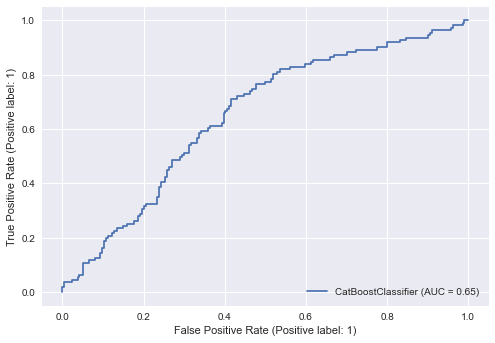

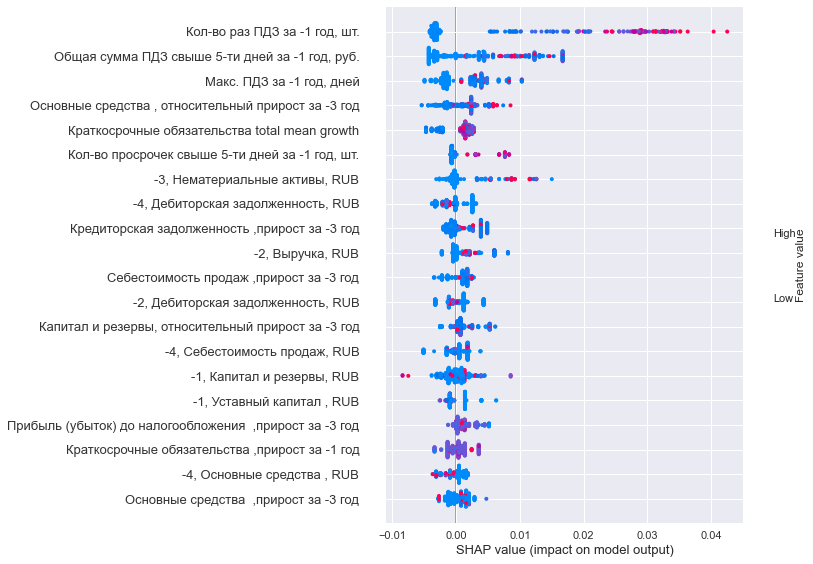

F1 = 0.0826, Precision = 0.5, Recall = 0.045, Accuracy = 0.6585, ROC_AUC = 0.6502


In [72]:
# {'class_w': 0.14717482857852135, 'iterations': 54.0, 'learning_rate': 0.0068328612336212265}

model = CatBoostClassifier(iterations=54,
                           depth=5, 
                           l2_leaf_reg=5, 
                           learning_rate=0.0068328612336212265,
                           loss_function='Logloss',
                           use_best_model=True,
                           eval_metric='AUC',
                           verbose=False,
                           class_weights=[1, 0.14717482857852135], # (df.shape[0] - df.binary_target.sum()) / df.binary_target.sum()],
                           random_seed=RANDOM_STATE,
                          )

# model = RandomForestClassifier(n_estimators=30)
# model = LogisticRegression(penalty='l2', C=1e-1, class_weight=[1, 1e-4])
make_report(model, df, treshold=0.5, to_file=False, file_path='../reports/report_petr.csv', create_new_clients=False, comment=f'after hyperopt')

In [70]:
from sklearn.metrics import log_loss

def get_catboost_params(space):
    params = dict()
    params['iterations'] = space['iterations']
    params['learning_rate'] = space['learning_rate']
    # params['depth'] = int(space['depth'])
    # params['l2_leaf_reg'] = space['l2_leaf_reg']
    params['class_w'] = space['class_w']
    return params

obj_call_count = 0
cur_best_loss = np.inf
cur_best_score = 0

X_train, X_test, y_train, y_test = data_split(df, create_new_clients=0.5)

def objective(space):
    global obj_call_count, cur_best_score, cur_best_loss

    obj_call_count += 1

    print('\nCatBoost objective call #{} cur_best_score={:7.5f}'.format(obj_call_count,cur_best_score) )

    params = get_catboost_params(space)

    sorted_params = sorted(space.items(), key=lambda z: z[0])
    params_str = str.join(' ', ['{}={}'.format(k, v) for k, v in sorted_params])
    print('Params: {}'.format(params_str) )

    model = CatBoostClassifier(iterations=params['iterations'],
                               depth=5, 
                               l2_leaf_reg=5, #params['l2_leaf_reg'], 
                               learning_rate=params['learning_rate'],
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, params['class_w']],
                               random_seed=RANDOM_STATE,
                                )
    
    
    model, preds, probas = fit_predict(model, X_train, y_train, X_test, y_test, treshold=0.5, plot_roc_auc=False)
    f1, precision, recall, acc, roc_auc = make_scores(y_test, preds, probas=probas)
    test_loss = log_loss(y_test, preds, labels=[0, 1])

    nb_trees = model.tree_count_

    print('nb_trees={}'.format(nb_trees))

    # if roc_auc >= cur_best_score:
    #     cur_best_score = roc_auc
    #     print('\033[92m' + 'NEW BEST ROC_AUC={}'.format(cur_best_score) + '\033[0m')
    
    if test_loss < cur_best_loss:
        cur_best_loss = test_loss
        print('\033[92m' + 'NEW BEST LOSS={}'.format(cur_best_loss) + '\033[0m')
        print('\033[92m' + 'NEW BEST ROC_AUC={}'.format(cur_best_score) + '\033[0m')


    return {'loss':test_loss, 'status': STATUS_OK }

In [71]:
space = {
    'iterations': hp.qloguniform('iterations', 2, 4, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, -1),
    # 'l2_leaf_reg': hp.uniform('l2_leaf_reg', 3, 8),
    'class_w': hp.loguniform('class_w', -2, 0),
}

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials,
    verbose=True
)

print('-'*50)
print('The best params:')
print( best )
print('\n\n')

                                                                                                                       
CatBoost objective call #1 cur_best_score=0.00000
Params: class_w=0.39614747588710714 iterations=24.0 learning_rate=0.047536014092990124                                 
Fitting model <catboost.core.CatBoostClassifier object at 0x0000025C47B65D60> with treshold = 0.5...                   
nb_trees=24                                                                                                            
NEW BEST ROC_AUC=0.6205270691252                                                                              
NEW BEST LOSS=17.960537690920905                                                                              
                                                                                                                       
CatBoost objective call #2 cur_best_score=0.62053
Params: class_w=0.5245467174397682 iterations=46.0 learning_rate=0.08515315151

Fitting model <catboost.core.CatBoostClassifier object at 0x000001F41CE23970> with treshold = 0.6...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

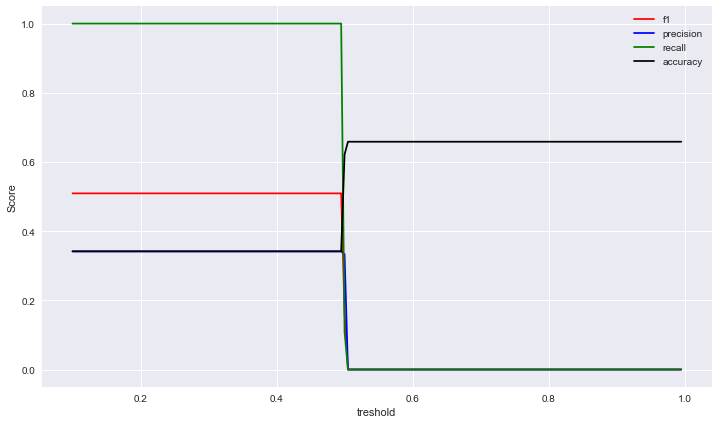

In [9]:
model = CatBoostClassifier(iterations=1000,
                           # depth=6.0, 
                           # l2_leaf_reg=4.17, 
                           learning_rate=1e-6,
                           loss_function='Logloss',
                           use_best_model=True,
                           eval_metric='F1',
                           verbose=False,
                           class_weights=[1, 1e-3],
                          )

#model = RandomForestClassifier(n_estimators=30)
validate_treshold(model, df)

In [8]:
X_train, X_test, y_train, y_test = data_split(df)

-4, Основные средства , RUB


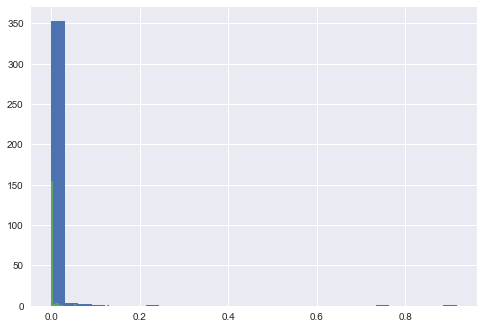

-3, Основные средства , RUB


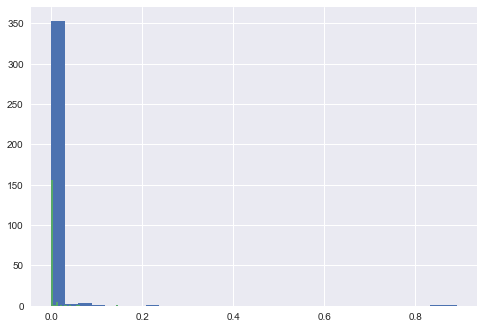

-2, Основные средства , RUB


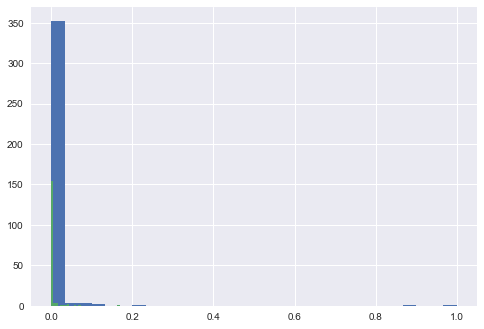

-1, Основные средства , RUB


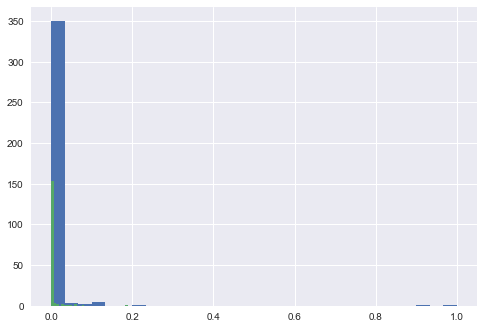

-4, Внеоборотные активы, RUB


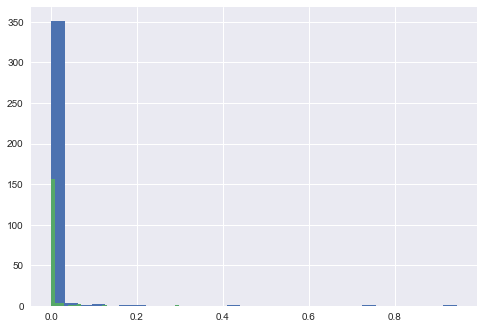

-3, Внеоборотные активы, RUB


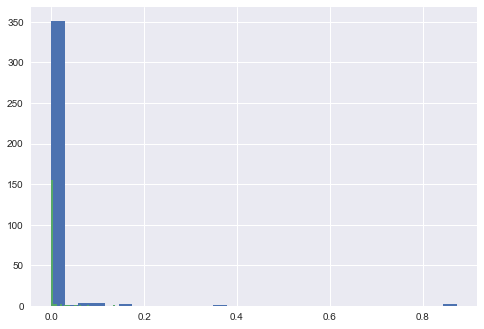

-2, Внеоборотные активы, RUB


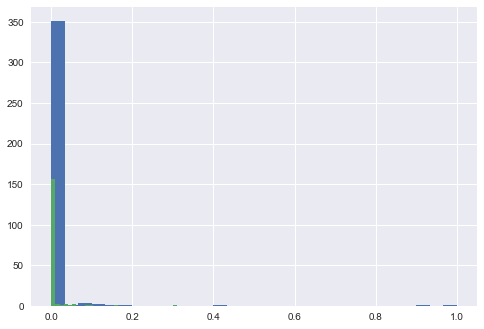

-1, Внеоборотные активы, RUB


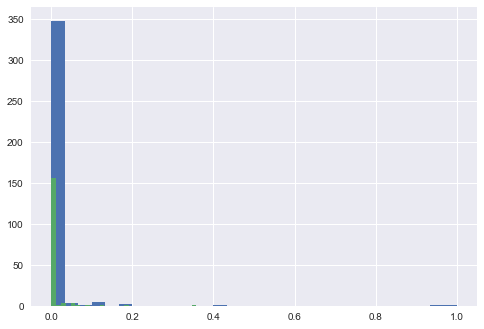

-4, Дебиторская задолженность, RUB


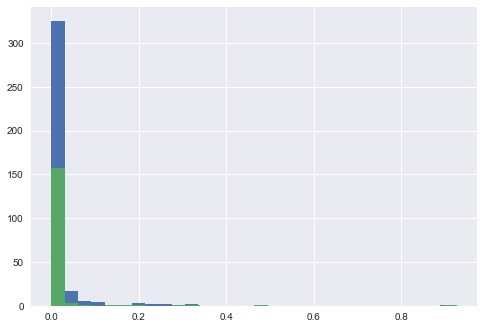

-3, Дебиторская задолженность, RUB


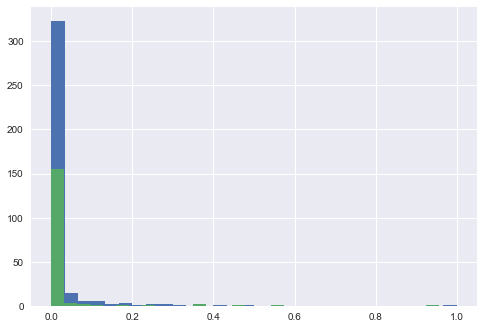

-2, Дебиторская задолженность, RUB


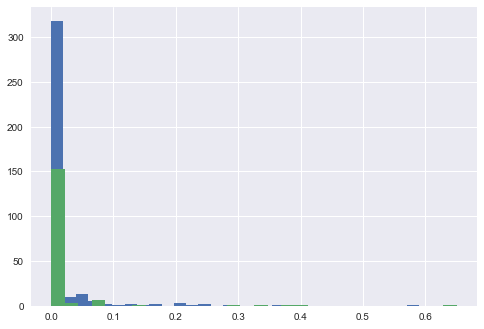

-1, Дебиторская задолженность, RUB


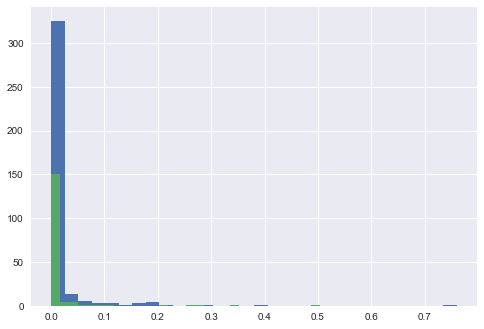

-4, Оборотные активы, RUB


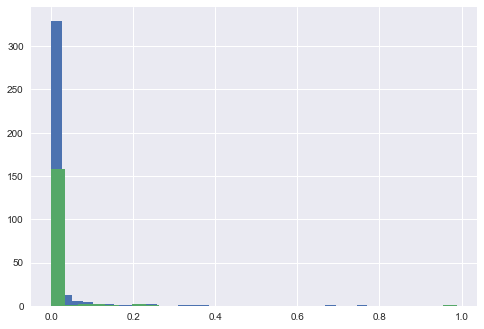

-3, Оборотные активы, RUB


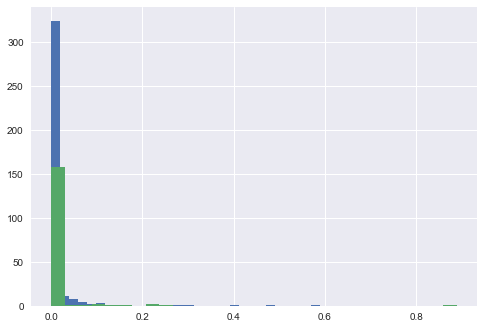

-2, Оборотные активы, RUB


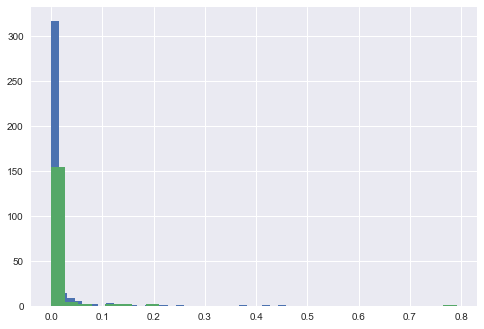

-1, Оборотные активы, RUB


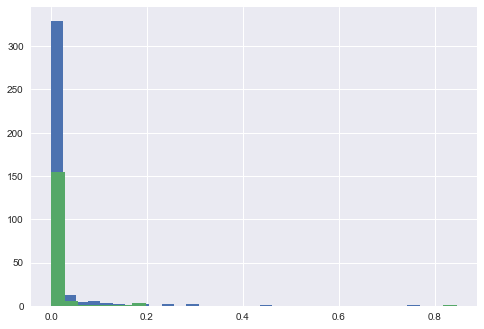

-4, Кредиторская задолженность, RUB


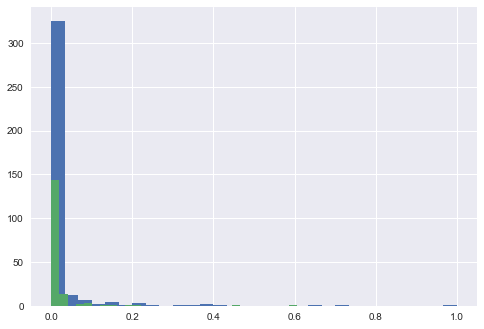

-3, Кредиторская задолженность, RUB


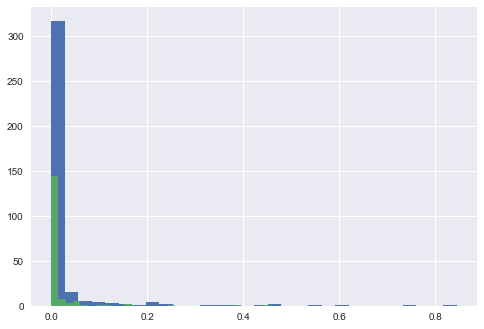

-2, Кредиторская задолженность, RUB


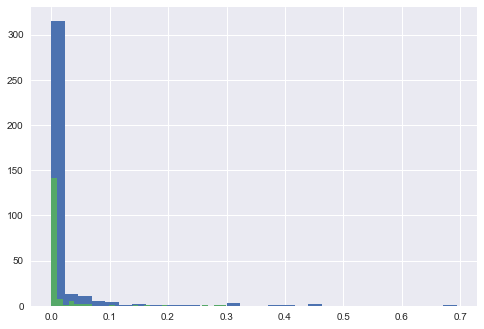

-1, Кредиторская задолженность, RUB


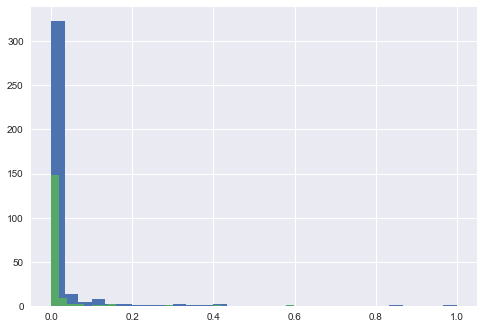

-4, Краткосрочные обязательства, RUB


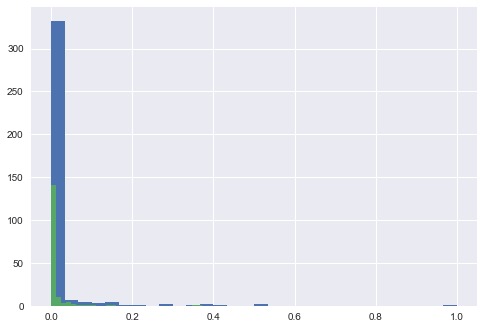

-3, Краткосрочные обязательства, RUB


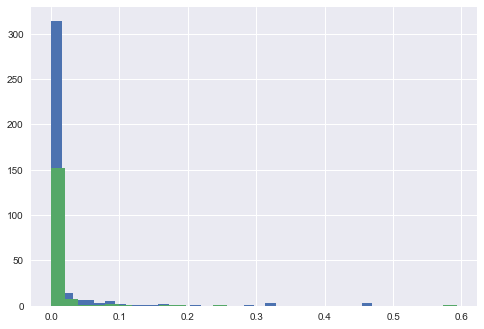

-2, Краткосрочные обязательства, RUB


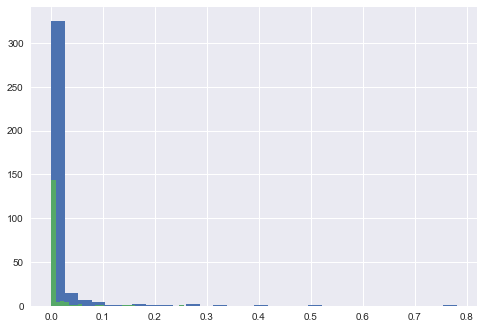

-1, Краткосрочные обязательства, RUB


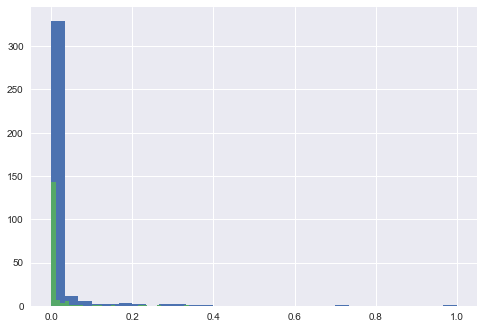

Основные средства  ,прирост за -3 год


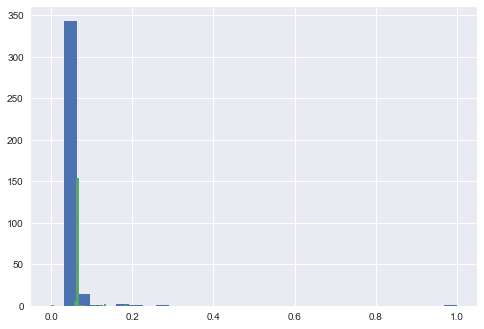

Основные средства  ,прирост за -2 год


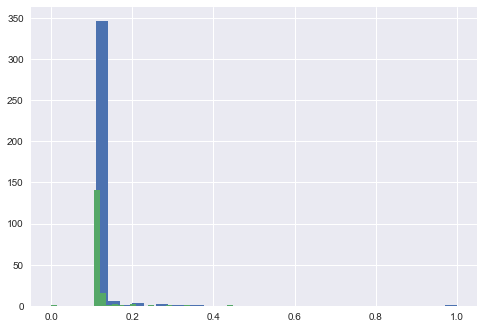

Основные средства  ,прирост за -1 год


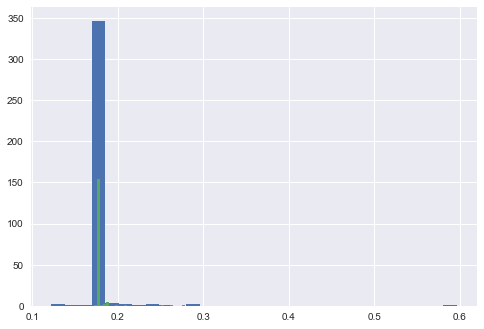

Внеоборотные активы ,прирост за -3 год


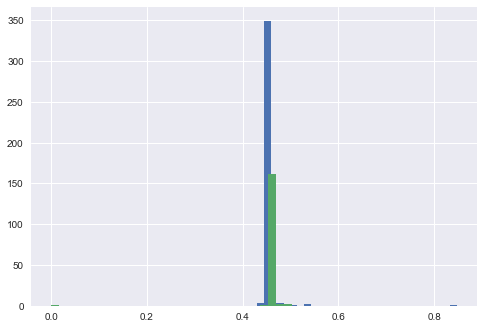

Внеоборотные активы ,прирост за -2 год


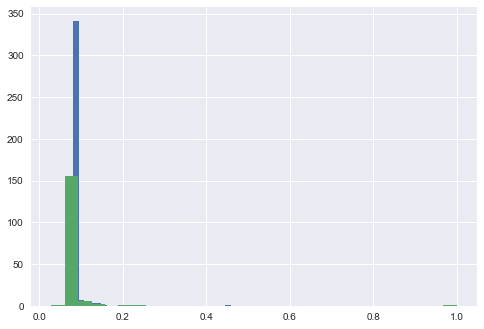

Внеоборотные активы ,прирост за -1 год


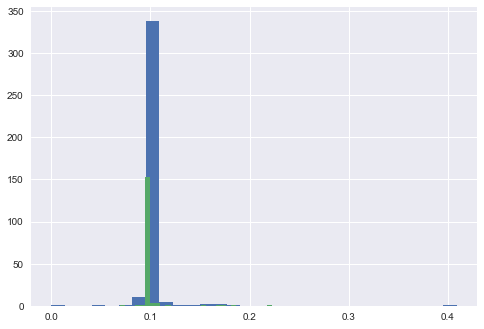

Дебиторская задолженность ,прирост за -3 год


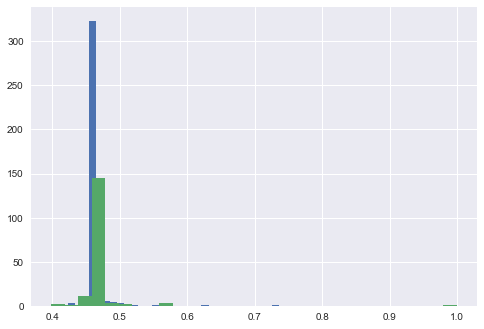

Дебиторская задолженность ,прирост за -2 год


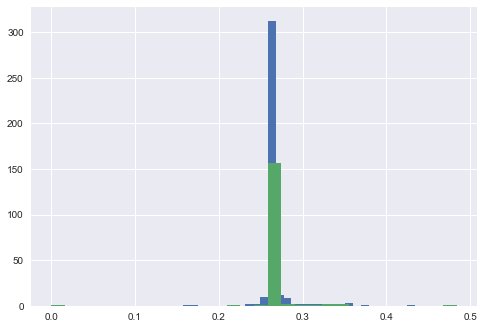

Дебиторская задолженность ,прирост за -1 год


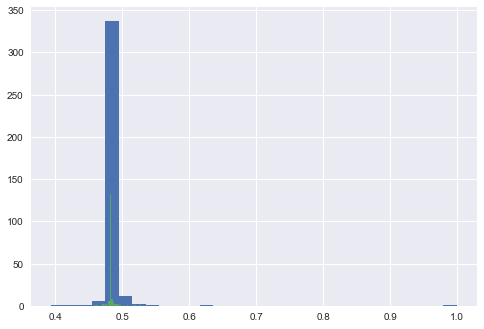

Оборотные активы ,прирост за -3 год


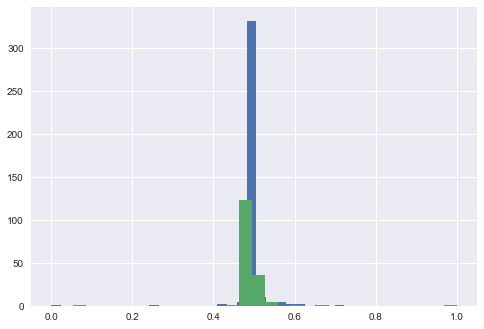

Оборотные активы ,прирост за -2 год


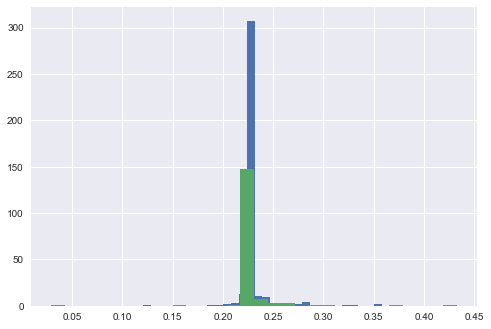

Оборотные активы ,прирост за -1 год


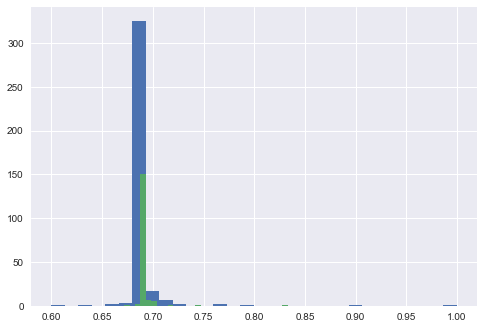

Кредиторская задолженность ,прирост за -3 год


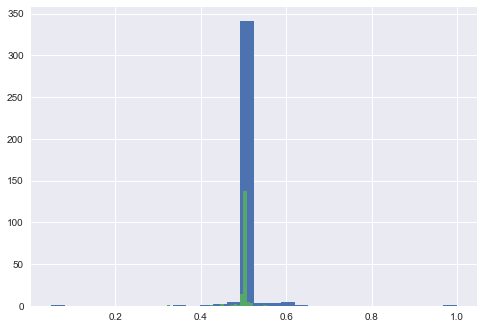

Кредиторская задолженность ,прирост за -2 год


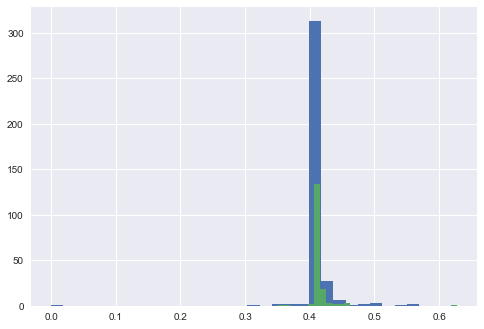

Кредиторская задолженность ,прирост за -1 год


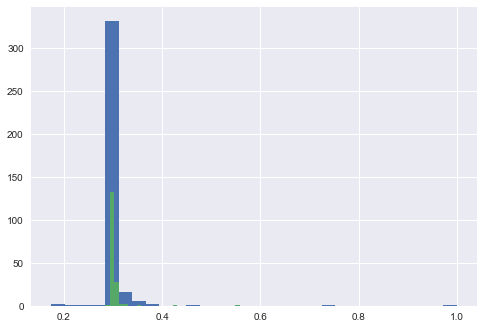

Краткосрочные обязательства ,прирост за -3 год


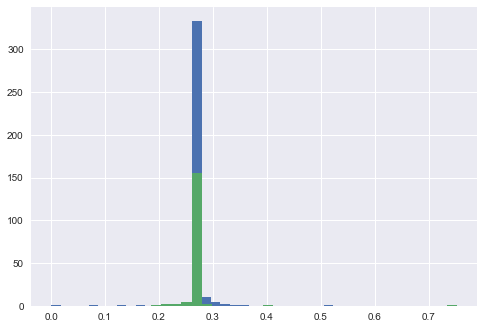

Краткосрочные обязательства ,прирост за -2 год


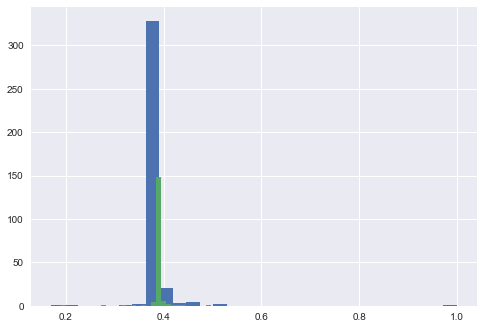

Краткосрочные обязательства ,прирост за -1 год


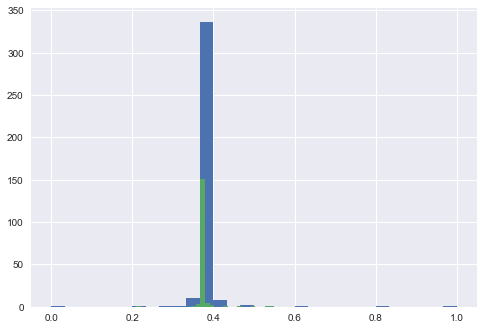

Основные средства , относительный прирост за -3 год


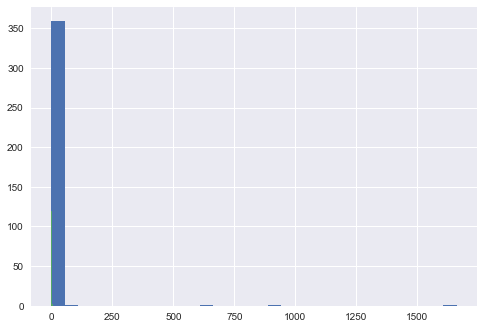

Основные средства , относительный прирост за -2 год


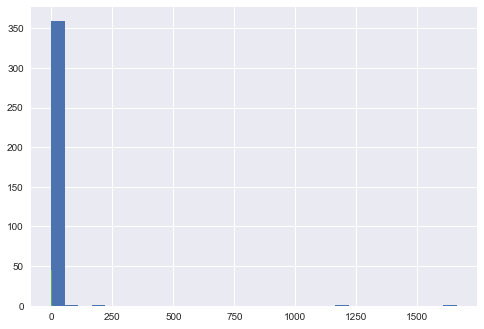

Основные средства , относительный прирост за -1 год


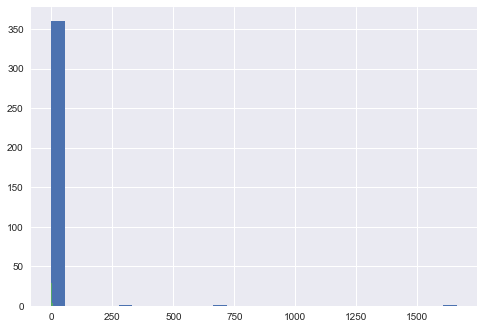

Внеоборотные активы, относительный прирост за -3 год


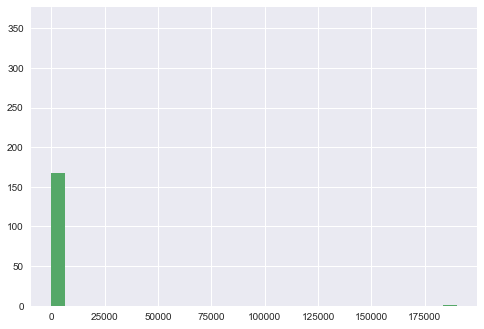

Внеоборотные активы, относительный прирост за -2 год


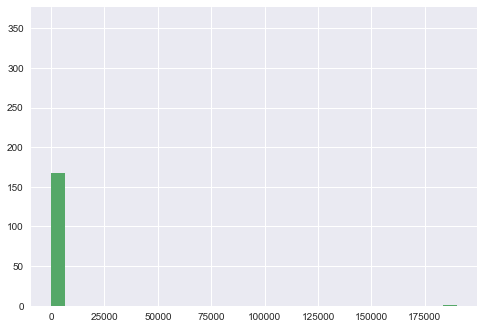

Внеоборотные активы, относительный прирост за -1 год


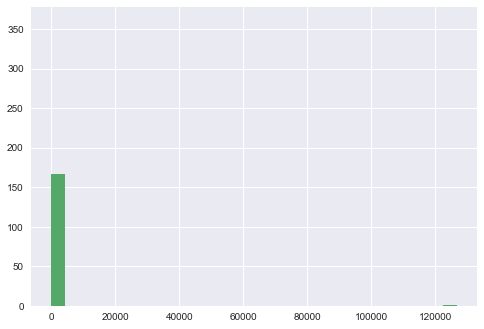

Дебиторская задолженность, относительный прирост за -3 год


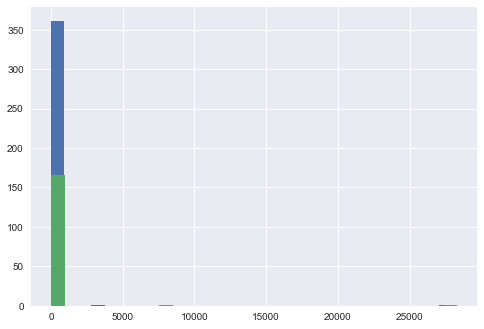

Дебиторская задолженность, относительный прирост за -2 год


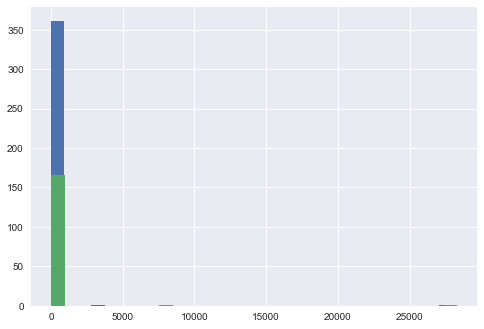

Дебиторская задолженность, относительный прирост за -1 год


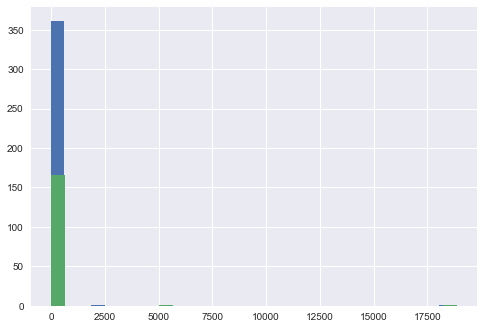

Оборотные активы, относительный прирост за -3 год


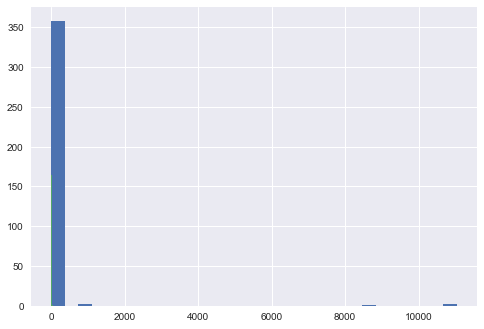

Оборотные активы, относительный прирост за -2 год


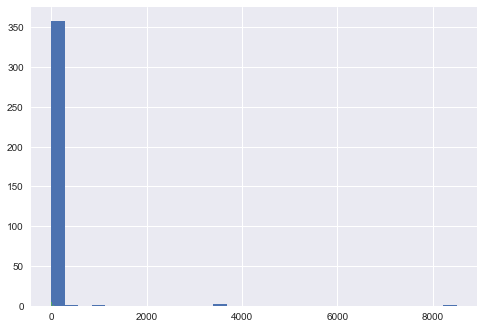

Оборотные активы, относительный прирост за -1 год


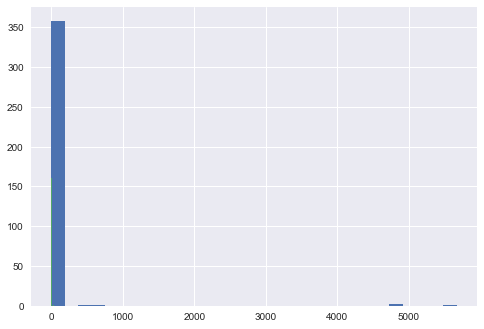

Кредиторская задолженность, относительный прирост за -3 год


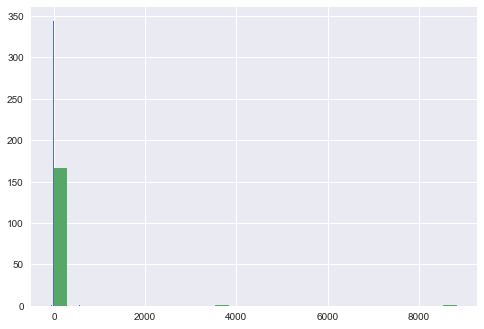

Кредиторская задолженность, относительный прирост за -2 год


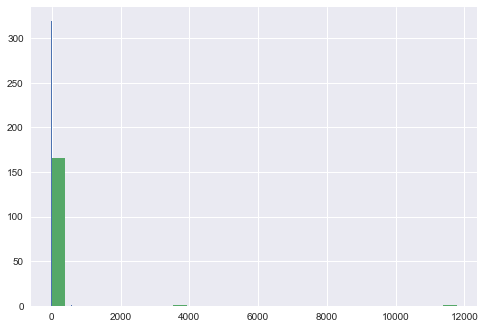

Кредиторская задолженность, относительный прирост за -1 год


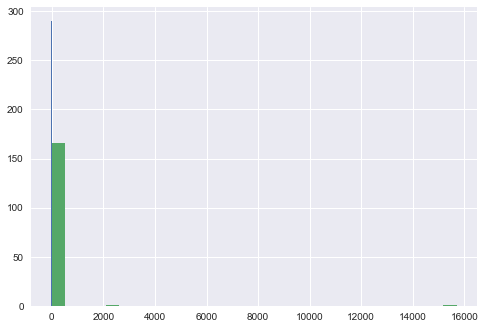

Краткосрочные обязательства, относительный прирост за -3 год


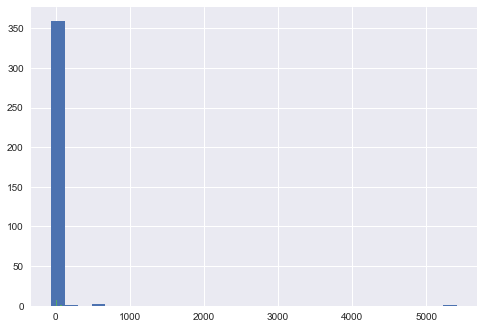

Краткосрочные обязательства, относительный прирост за -2 год


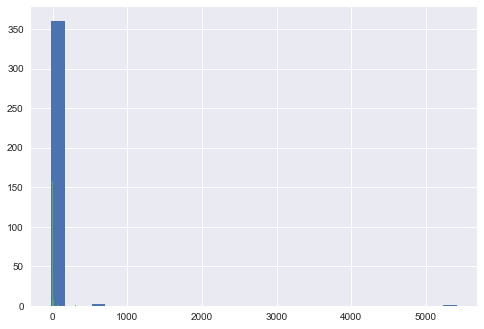

Краткосрочные обязательства, относительный прирост за -1 год


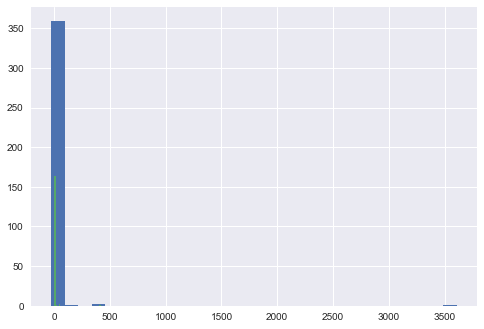

In [22]:
for col in new_cols: #X_train.columns:
    print(col)
    # sns.displot(data=X_train.iloc[np.where(y_train == 1)], x=col)#, kde=True)
    # sns.displot(data=X_train.iloc[np.where(y_train == 0)], x=col)#, kde=True)
    plt.hist(X_train.iloc[np.where(y_train == 1)][col], bins=30)
    plt.hist(X_train.iloc[np.where(y_train == 0)][col], bins=30)
    plt.show()

In [40]:
np.around(model.predict_proba(X_train)[:, 1][:100], 3)

array([0.998, 0.997, 1.   , 0.998, 0.998, 0.999, 0.001, 0.999, 0.999,
       1.   , 0.998, 1.   , 1.   , 0.997, 0.002, 0.997, 0.003, 0.002,
       0.002, 0.002, 0.998, 0.998, 0.002, 0.999, 0.999, 0.998, 0.002,
       0.001, 0.999, 0.999, 0.999, 0.998, 1.   , 0.998, 0.999, 0.002,
       0.002, 1.   , 0.998, 1.   , 0.997, 0.002, 0.002, 0.999, 0.997,
       1.   , 0.002, 0.995, 0.999, 0.998, 0.002, 0.998, 0.998, 0.002,
       0.998, 0.995, 0.997, 0.002, 0.002, 0.999, 0.998, 0.998, 0.002,
       0.998, 0.998, 0.998, 0.999, 0.001, 0.998, 0.002, 0.998, 0.999,
       0.998, 0.997, 0.001, 0.998, 0.998, 0.998, 0.999, 0.002, 0.002,
       0.998, 0.999, 0.999, 0.999, 0.002, 0.999, 0.002, 0.001, 0.999,
       0.999, 0.999, 0.996, 0.003, 0.998, 1.   , 0.997, 0.999, 0.001,
       0.002])

In [41]:
probas = model.predict_proba(X_test)[:, 1]

In [42]:
np.around(probas[:100], 3)

array([0.978, 0.999, 0.986, 0.999, 0.99 , 0.951, 0.944, 0.963, 0.999,
       0.817, 0.827, 0.934, 0.08 , 0.318, 0.997, 0.953, 0.997, 0.615,
       0.768, 0.996, 0.977, 0.944, 1.   , 0.78 , 0.903, 1.   , 0.995,
       0.754, 0.937, 0.715, 0.978, 0.998, 0.943, 0.989, 0.008, 0.162,
       1.   , 0.634, 0.98 , 0.996, 0.812, 0.005, 0.999, 0.982, 0.057,
       0.994, 1.   , 0.999, 0.992, 0.999, 1.   , 0.992, 0.998, 0.999,
       0.975, 1.   , 0.915, 0.547, 0.999, 0.995, 0.994, 0.552, 0.87 ,
       0.957, 0.404, 0.594, 1.   , 0.99 , 0.917, 1.   , 0.765, 0.946,
       0.985, 0.989, 0.907, 0.995, 0.999, 0.869, 0.917, 1.   , 0.976,
       0.999, 0.951, 0.996, 0.793, 0.819, 0.99 , 1.   , 0.999, 1.   ,
       0.898, 0.939, 0.508, 0.938, 0.961, 0.981, 0.905, 0.927, 0.917,
       0.998])

In [43]:
best = 0
xx = 0
for x in sorted(probas):
    pr = precision_score(y_test, probas >= x)
    rl = recall_score(y_test, probas >= x)
    best_ = f1_score(y_test, probas >= x)
    # best_ = pr * rl
    if best_ >= best:
        best = best_
        xx = x


In [44]:
xx

0.4007881840139303

In [45]:
precision_score(y_test, probas >= xx), recall_score(y_test, probas >= xx)

(0.3569023569023569, 0.954954954954955)